In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!rm -r TA/
!git clone https://github.com/keenan09/TA.git

rm: cannot remove 'TA/': No such file or directory
Cloning into 'TA'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 1.78 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
url = '/content/TA/dataset_after_preprocessing.csv'
dataset = pd.read_csv(url)

dataset

,review,label,tokens
0,iklan maksa,0,"['iklan', 'maksa']"
1,aplikasi bagus spam iklan sorry gue kasih bint...,0,"['aplikasi', 'bagus', 'spam', 'iklan', 'sorry'..."
2,suka belanja lazada gratis ongkir fungsi tulis...,0,"['suka', 'belanja', 'lazada', 'gratis', 'ongki..."
3,barang sesuai,0,"['barang', 'sesuai']"
4,aplikasi kasi limit pakai limit lo kasi limit ...,0,"['aplikasi', 'kasi', 'limit', 'pakai', 'limit'..."
...,...,...,...
9073,makasih,1,['makasih']
9074,dapet fitur lazada paylater,0,"['dapet', 'fitur', 'lazada', 'paylater']"
9075,beli jujur amanah,1,"['beli', 'jujur', 'amanah']"
9076,baik layan butuh langgan semangat its the best,1,"['baik', 'layan', 'butuh', 'langgan', 'semanga..."


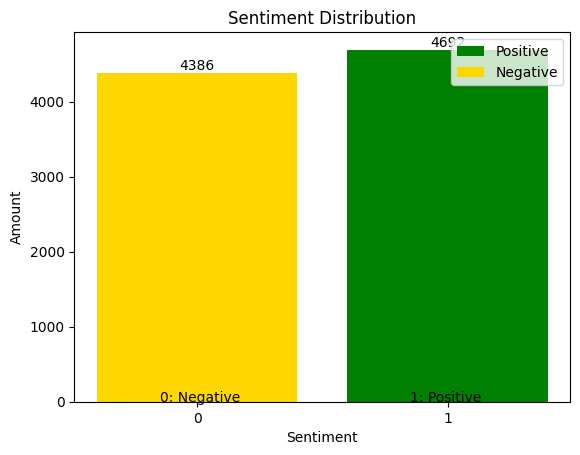

Sentiment Amount: 1    4692
0    4386
Name: label, dtype: int64


In [ ]:
sentiment_counts = dataset['label'].value_counts()
labels = sentiment_counts.index.tolist()
# Visualisasi ke Jumlah comments positif dan negatif ke dalam bar chart
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gold'])

# Adding text annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.xticks(range(len(labels)), labels.reverse()) #label x axis
plt.text(-0.15, -5, '0: Negative') #keterangan
plt.text(0.85, -5, '1: Positive') #keterangan
plt.xlabel('Sentiment')
plt.ylabel('Amount')
plt.title('Sentiment Distribution')
plt.legend(bars, ['Positive', 'Negative'])
plt.show()
print(f'Sentiment Amount: {sentiment_counts}')

**TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY**

In [ ]:
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_df["review"])

# #Get the feature names (words) from the vectorizer
# feature_names = tfidf_vectorizer.get_feature_names_out()

# #Create a dictionary to store TF-IDF values for each document
# tfidf_values = {}
# for i, document in enumerate(stemmed_df["review"]):
#     tfidf_values[f'Document {i+1}'] = dict(zip(feature_names, tfidf_matrix_dense[i]))

# #values
# for doc, values in tfidf_values.items():
#     print(doc)
#     for term, score in values.items():
#         print(f"{term}: {score}")
#     print("\n")

# tf_idf = TfidfVectorizer(max_features = 1000)
# text_tfidf = tf_idf.fit_transform(dataset['tokens'].astype('U')).toarray()
# text_tfidf

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['tokens'], dataset['label'], test_size=0.2, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(dataset['tokens'], dataset['label'], test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7262,)
X_test shape: (1816,)
y_train shape: (7262,)
y_test shape: (1816,)


In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# X_train, X_test, y_train, y_test = train_test_split(text_tfidf, dataset['label'], test_size=0.2, random_state = 42)

tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()


**MULTINOMIAL NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import SelectKBest, chi2

mnb = MultinomialNB().fit(X_train, y_train)
predict_mnb = mnb.predict(X_test)


# Perform 10-fold cross-validation
cv_acc_score = cross_val_score(mnb, X_test, y_test, cv=10, scoring='accuracy')
cv_f1_score = cross_val_score(mnb, X_test, y_test, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_acc_score)
print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

print("Cross-Validation F1 Scores:", cv_f1_score)
print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))

mnb_accuracy = round((accuracy_score(y_test, predict_mnb) * 100), 2)
mnb_precision = round((precision_score(y_test, predict_mnb, average='binary') * 100) ,2)
mnb_recall = round((recall_score(y_test, predict_mnb, average='binary') * 100) ,2)
mnb_f1_score = round((f1_score(y_test, predict_mnb, average='binary') * 100) ,2)

print("Multinomial Naive Bayes Accuracy : ", mnb_accuracy ,'%')
print("Multinomial Naive Bayes Precision : ", mnb_precision ,'%')
print("Multinomial Naive Bayes Recall : ", mnb_recall ,'%')
print("Multinomial Naive Bayes F1-Score : ", mnb_f1_score ,'%')

print(f'confusion matrix:\n{confusion_matrix(y_test, predict_mnb)}')
print("------------------------")
print(classification_report(y_test, predict_mnb, zero_division=0))

# k_best = SelectKBest(score_func=chi2, k=10)  # You can adjust the number of important words to retrieve
# X_train_chi2 = k_best.fit_transform(X_train, y_train)

# # Get the indices of the most important words
# indices = np.argsort(k_best.scores_)[::-1][:10]
# feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# print("Most Important Words:")
# for i in indices:
#     print(feature_names[i])

Cross-Validation Accuracy Scores: [0.9010989  0.85714286 0.87362637 0.93406593 0.90659341 0.87362637
 0.90607735 0.8839779  0.90055249 0.87292818]
Mean CV Accuracy: 89.10%
Cross-Validation F1 Scores: [0.90816327 0.86315789 0.87700535 0.94       0.91005291 0.88205128
 0.91282051 0.88770053 0.90322581 0.88082902]
Mean CV F1-Score: 89.65%
Multinomial Naive Bayes Accuracy :  89.98 %
Multinomial Naive Bayes Precision :  90.25 %
Multinomial Naive Bayes Recall :  90.63 %
Multinomial Naive Bayes F1-Score :  90.44 %
confusion matrix:
[[773  93]
 [ 89 861]]
------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       866
           1       0.90      0.91      0.90       950

    accuracy                           0.90      1816
   macro avg       0.90      0.90      0.90      1816
weighted avg       0.90      0.90      0.90      1816



**BERNOULLI NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train, y_train)
predict_bnb = bnb.predict(X_test)

# Perform 10-fold cross-validation
cv_acc_score = cross_val_score(bnb, X_test, y_test, cv=10, scoring='accuracy')
cv_f1_score = cross_val_score(bnb, X_test, y_test, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_acc_score)
print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

print("Cross-Validation F1 Scores:", cv_f1_score)
print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))


bnb_accuracy = round((accuracy_score(y_test, predict_bnb) * 100), 2)
bnb_precision = round((precision_score(y_test, predict_bnb, average='binary') * 100) ,2)
bnb_recall = round((recall_score(y_test, predict_bnb, average='binary') * 100) ,2)
bnb_f1_score = round((f1_score(y_test, predict_bnb, average='binary') * 100) ,2)

print("Bernoulli Naive Bayes Accuracy : ", bnb_accuracy ,'%')
print("Bernoulli Naive Bayes Precision : ", bnb_precision ,'%')
print("Bernoulli Naive Bayes Recall : ", bnb_recall ,'%')
print("Bernoulli Naive Bayes F1-Score : ",  bnb_f1_score ,'%')

print(f'confusion matrix:\n{confusion_matrix(y_test, predict_bnb)}')
print("------------------------")
print(classification_report(y_test, predict_bnb, zero_division=0))

Cross-Validation Accuracy Scores: [0.83516484 0.81868132 0.8021978  0.80769231 0.81318681 0.79120879
 0.83977901 0.83977901 0.78453039 0.80662983]
Mean CV Accuracy: 81.39%
Cross-Validation F1 Scores: [0.85849057 0.84507042 0.82857143 0.84304933 0.83809524 0.82568807
 0.86384977 0.85853659 0.81690141 0.83568075]
Mean CV F1-Score: 84.14%
Bernoulli Naive Bayes Accuracy :  84.2 %
Bernoulli Naive Bayes Precision :  79.47 %
Bernoulli Naive Bayes Recall :  94.11 %
Bernoulli Naive Bayes F1-Score :  86.17 %
confusion matrix:
[[635 231]
 [ 56 894]]
------------------------
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       866
           1       0.79      0.94      0.86       950

    accuracy                           0.84      1816
   macro avg       0.86      0.84      0.84      1816
weighted avg       0.85      0.84      0.84      1816



In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB().fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)
# X_test_reshaped = np.reshape(X_test, (-1, 1))

# Perform 10-fold cross-validation
cv_acc_score = cross_val_score(gnb, X_test, y_test, cv=10, scoring='accuracy')
cv_f1_score = cross_val_score(gnb, X_test, y_test, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_acc_score)
print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

print("Cross-Validation F1 Scores:", cv_f1_score)
print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))

gnb_accuracy = round((accuracy_score(y_test, predict_gnb) * 100), 2)
gnb_precision = round((precision_score(y_test, predict_gnb, average='binary') * 100) ,2)
gnb_recall = round((recall_score(y_test, predict_gnb, average='binary') * 100) ,2)
gnb_f1_score = round((f1_score(y_test, predict_gnb, average='binary') * 100) ,2)

print("Multinomial Naive Bayes Accuracy : ", gnb_accuracy ,'%')
print("Multinomial Naive Bayes Precision : ", gnb_precision ,'%')
print("Multinomial Naive Bayes Recall : ", gnb_recall ,'%')
print("Multinomial Naive Bayes F1-Score : ", gnb_f1_score ,'%')

print(f'confusion matrix:\n{confusion_matrix(y_test, predict_gnb)}')
print("------------------------")
print(classification_report(y_test, predict_gnb, zero_division=0))

Cross-Validation Accuracy Scores: [0.81868132 0.78571429 0.78571429 0.82417582 0.8021978  0.79120879
 0.85082873 0.79558011 0.80662983 0.77348066]
Mean CV Accuracy: 80.34%
Cross-Validation F1 Scores: [0.84210526 0.8115942  0.8040201  0.8490566  0.82       0.81730769
 0.8708134  0.81218274 0.8241206  0.8056872 ]
Mean CV F1-Score: 82.57%
Multinomial Naive Bayes Accuracy :  79.96 %
Multinomial Naive Bayes Precision :  73.67 %
Multinomial Naive Bayes Recall :  96.0 %
Multinomial Naive Bayes F1-Score :  83.36 %
confusion matrix:
[[540 326]
 [ 38 912]]
------------------------
              precision    recall  f1-score   support

           0       0.93      0.62      0.75       866
           1       0.74      0.96      0.83       950

    accuracy                           0.80      1816
   macro avg       0.84      0.79      0.79      1816
weighted avg       0.83      0.80      0.79      1816



**SUPPORT VECTOR MACHINE**

In [ ]:
# from sklearn.svm import SVC

# svm = SVC(kernel='linear', probability=True).fit(X_train, y_train)
# # svm.fit(X_train, y_train)

# predict_svm = svm.predict(X_test)
# # Perform 10-fold cross-validation
# cv_acc_score = cross_val_score(svm, X_test, y_test, cv=10, scoring='accuracy')
# cv_f1_score = cross_val_score(svm, X_test, y_test, cv=10, scoring='f1')

# # Print the cross-validation scores
# print("Cross-Validation Accuracy Scores:", cv_acc_score)
# print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

# print("Cross-Validation F1 Scores:", cv_f1_score)
# print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))
# svm_accuracy = round((accuracy_score(y_test, predict_svm) * 100), 2)
# svm_precision = round((precision_score(y_test, predict_svm, average='binary') * 100) ,2)
# svm_recall = round((recall_score(y_test, predict_svm, average='binary') * 100) ,2)
# svm_f1_score = round((f1_score(y_test, predict_svm, average='binary') * 100) ,2)

# print("Support Vector Machine Accuracy : ", svm_accuracy ,'%')
# print("Support Vector Machine Precision : ", svm_precision ,'%')
# print("Support Vector Machine Recall : ", svm_recall ,'%')
# print("Support Vector Machine F1-Score : ", svm_f1_score ,'%')

# print(f'confusion matrix:\n{confusion_matrix(y_test, predict_svm)}')
# print("------------------------")
# print(classification_report(y_test, predict_svm, zero_division=0))

**HARD VOTING MAJORITY**

In [ ]:
from sklearn.ensemble import VotingClassifier

hard_ensemble_clf = VotingClassifier(estimators=[
    ('multinomial_naive_bayes', mnb),
    # ('support_vector_machine', svm),
    ('gaussian_naive_bayes', gnb),
    ('bernoulli_naive_bayes', bnb)
], voting='hard').fit(X_train, y_train)

# hard_ensemble_clf.fit(X_train, y_train)
hard_voting_predict = hard_ensemble_clf.predict(X_test)

# Perform 10-fold cross-validation
cv_acc_score = cross_val_score(hard_ensemble_clf, X_test, y_test, cv=10, scoring='accuracy')
cv_f1_score = cross_val_score(hard_ensemble_clf, X_test, y_test, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_acc_score)
print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

print("Cross-Validation F1 Scores:", cv_f1_score)
print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))

hard_voting_accuracy = round((accuracy_score(y_test, hard_voting_predict) * 100), 2)
hard_voting_precision = round((precision_score(y_test, hard_voting_predict, average='binary') * 100) ,2)
hard_voting_recall = round((recall_score(y_test, hard_voting_predict, average='binary') * 100) ,2)
hard_voting_f1_score = round((f1_score(y_test, hard_voting_predict, average='binary') * 100) ,2)

print("Hard Voting Majority Accuracy : ", hard_voting_accuracy ,'%')
print("Hard Voting Majority Precision : ", hard_voting_precision ,'%')
print("Hard Voting Majority Recall : ", hard_voting_recall ,'%')
print("Hard Voting Majority F1-Score : ", hard_voting_f1_score ,'%')

print(f'confusion matrix:\n{confusion_matrix(y_test, hard_voting_predict)}')
print("------------------------")
print(classification_report(y_test, hard_voting_predict, zero_division=0))

Cross-Validation Accuracy Scores: [0.85164835 0.82967033 0.82967033 0.87362637 0.85714286 0.82417582
 0.89502762 0.84530387 0.83977901 0.83977901]
Mean CV Accuracy: 84.86%
Cross-Validation F1 Scores: [0.86829268 0.84729064 0.84263959 0.89099526 0.87       0.84466019
 0.90731707 0.85714286 0.85279188 0.85990338]
Mean CV F1-Score: 86.41%
Hard Voting Majority Accuracy :  86.78 %
Hard Voting Majority Precision :  82.87 %
Hard Voting Majority Recall :  94.21 %
Hard Voting Majority F1-Score :  88.18 %
confusion matrix:
[[681 185]
 [ 55 895]]
------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       866
           1       0.83      0.94      0.88       950

    accuracy                           0.87      1816
   macro avg       0.88      0.86      0.87      1816
weighted avg       0.87      0.87      0.87      1816



**SOFT VOTING MAJORITY**

In [ ]:
soft_ensemble_clf = VotingClassifier(estimators=[
    ('multinomial_naive_bayes', mnb),
    # ('support_vector_machine', svm),
    ('gaussian_naive_bayes', gnb),
    ('bernoulli_naive_bayes', bnb)
], voting='soft').fit(X_train, y_train)

# soft_ensemble_clf.fit(X_train, y_train)
soft_voting_predict = soft_ensemble_clf.predict(X_test)

# Perform 10-fold cross-validation
cv_acc_score = cross_val_score(soft_ensemble_clf, X_test, y_test, cv=10, scoring='accuracy')
cv_f1_score = cross_val_score(soft_ensemble_clf, X_test, y_test, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_acc_score)
print("Mean CV Accuracy: {:.2f}%".format(cv_acc_score.mean() * 100))

print("Cross-Validation F1 Scores:", cv_f1_score)
print("Mean CV F1-Score: {:.2f}%".format(cv_f1_score.mean() * 100))

soft_voting_accuracy = round((accuracy_score(y_test, soft_voting_predict) * 100), 2)
soft_voting_precision = round((precision_score(y_test, soft_voting_predict, average='binary') * 100) ,2)
soft_voting_recall = round((recall_score(y_test, soft_voting_predict, average='binary') * 100) ,2)
soft_voting_f1_score = round((f1_score(y_test, soft_voting_predict, average='binary') * 100) ,2)

print("Soft Voting Majority Accuracy : ", soft_voting_accuracy ,'%')
print("Soft Voting Majority Precision : ", soft_voting_precision ,'%')
print("Soft Voting Majority Recall : ", soft_voting_recall ,'%')
print("Soft Voting Majority F1-Score : ", soft_voting_f1_score ,'%')

print(f'confusion matrix:\n{confusion_matrix(y_test, soft_voting_predict)}')
print("------------------------")
print(classification_report(y_test, soft_voting_predict, zero_division=0))

Cross-Validation Accuracy Scores: [0.85164835 0.81318681 0.81868132 0.86263736 0.85714286 0.81868132
 0.8839779  0.83977901 0.83425414 0.82872928]
Mean CV Accuracy: 84.09%
Cross-Validation F1 Scores: [0.86829268 0.83333333 0.83417085 0.88151659 0.87254902 0.84210526
 0.89756098 0.85279188 0.84848485 0.85024155]
Mean CV F1-Score: 85.81%
Soft Voting Majority Accuracy :  85.63 %
Soft Voting Majority Precision :  81.12 %
Soft Voting Majority Recall :  94.53 %
Soft Voting Majority F1-Score :  87.31 %
confusion matrix:
[[657 209]
 [ 52 898]]
------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       866
           1       0.81      0.95      0.87       950

    accuracy                           0.86      1816
   macro avg       0.87      0.85      0.85      1816
weighted avg       0.87      0.86      0.85      1816



**VISUALISASI**

In [ ]:
# accuracy_scores = [mnb_accuracy, bnb_accuracy, svm_accuracy, hard_voting_accuracy, soft_voting_accuracy]
# precision_scores = [mnb_precision, bnb_precision, svm_precision, hard_voting_precision, soft_voting_precision]
# recall_scores = [mnb_recall, bnb_recall, svm_recall, hard_voting_recall, soft_voting_recall]
# f1_scores = [mnb_f1_score, bnb_f1_score, svm_f1_score, hard_voting_f1_score, soft_voting_f1_score]

# methods = ["Multinomial NB", "Bernoulli NB", "SVM", "Hard Voting", "Soft Voting"]


# # Plotting accuracy
# plt.figure(figsize=(12 , 6))
# ax = plt.barh(methods, accuracy_scores, color='skyblue')
# plt.xlabel('Accuracy (%)')
# plt.title('Accuracy Comparison')
# plt.xlim(0, 100)
# plt.gca().invert_yaxis()

# # Add labels on top of the bars
# for i, v in enumerate(accuracy_scores):
#     plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12, color='black', fontweight='bold')

# plt.show()

# # Plotting precision
# plt.figure(figsize=(12 , 6))
# ax = plt.barh(methods, precision_scores, color='grey')
# plt.xlabel('Precision (%)')
# plt.title('Precision Comparison')
# plt.xlim(0, 100)
# plt.gca().invert_yaxis()

# # Add labels on top of the bars
# for i, v in enumerate(precision_scores):
#     plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12, color='black', fontweight='bold')

# plt.show()

# # Plotting recall
# plt.figure(figsize=(12 , 6))
# ax = plt.barh(methods, recall_scores, color='pink')
# plt.xlabel('Recall (%)')
# plt.title('Recall Comparison')
# plt.xlim(0, 100)
# plt.gca().invert_yaxis()

# # Add labels on top of the bars
# for i, v in enumerate(recall_scores):
#     plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12, color='black', fontweight='bold')

# plt.show()

# # Plotting f1
# plt.figure(figsize=(12 , 6))
# ax = plt.barh(methods, f1_scores, color='purple')
# plt.xlabel('F1 Score (%)')
# plt.title('F1 Score Comparison')
# plt.xlim(0, 100)
# plt.gca().invert_yaxis()

# # Add labels on top of the bars
# for i, v in enumerate(f1_scores):
#     plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12, color='black', fontweight='bold')

# plt.show()